# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera
# Investment Strategy Athens Greece

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data and their processing](#data)
* [Methodology and exploratory data analysis](#methodology)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

### Introduction: Business Problem

In  this  report  we  will  use  data  in  order  to  analyze  which  venues  overcrowd  the  center  of Athens  and  thus  determine  which  investments  will  face  high  competition.   Moreover,  weprovide certain dense areas with lack of specific venues.  Of course, this will be valuable forinvestment agencies since an accurate report will provide information on which venues theyshould avoid spending money on.

### Data and their processing

For my report, data from the Foursquare API was used. The data contains the venues around the center of Athens together with among others their exact location, address and distance from the city center. 
Moreover, since I was not interested in a particular venue, but rather in the category that each venue falls into, I obtained the category of each one.

In [1]:
# Importing Libraries
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

In [2]:
# My credentials
CLIENT_ID = 'FVDQ13V4GEIKKHIASW1FL1LXL1NRQAMH100XNXD0KGHMAMCI' # your Foursquare ID
CLIENT_SECRET = '11JWZ3YYGWSAMTPNCRUKK2DAND5QFBWMHC2R4ZXRQX0IW4GX' # your Foursquare Secret
VERSION = '20180604'

#### Obtaining my data

In [3]:
latitude=37.983810
longitude=23.727539
radius = 6000
LIMIT = 80
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url
results = requests.get(url).json()
results
items = results['response']['groups'][0]['items']
items[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '4e822369f5b91d2e46d16f27',
  'name': 'National Theatre of Greece (Εθνικό Θέατρο)',
  'location': {'address': 'Αγίου Κωνσταντίνου 22-24',
   'lat': 37.98474217257332,
   'lng': 23.725541110739435,
   'labeledLatLngs': [{'label': 'display',
     'lat': 37.98474217257332,
     'lng': 23.725541110739435}],
   'distance': 203,
   'postalCode': '104 37',
   'cc': 'GR',
   'city': 'Αθήνα',
   'state': 'Αττική',
   'country': 'Ελλάδα',
   'formattedAddress': ['Αγίου Κωνσταντίνου 22-24',
    '104 37 Αθήνα, Αττική',
    'Ελλάδα']},
  'categories': [{'id': '4bf58dd8d48988d137941735',
    'name': 'Theater',
    'pluralName': 'Theaters',
    'shortName': 'Theater',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/performingarts_theater_',
     'suffix': '.png'},
    'primary': True}],
  'photos': {'count': 

#### Processing my data

In [4]:
from pandas.io.json import json_normalize
from IPython.display import Image 
from IPython.core.display import HTML 
dataframe = json_normalize(items) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head(10)

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,National Theatre of Greece (Εθνικό Θέατρο),Theater,Αγίου Κωνσταντίνου 22-24,GR,Αθήνα,Ελλάδα,NaN,203,"[Αγίου Κωνσταντίνου 22-24, 104 37 Αθήνα, Αττικ...","[{'label': 'display', 'lat': 37.98474217257332...",37.984742,23.725541,NaN,104 37,Αττική,4e822369f5b91d2e46d16f27
1,Στάνη Γαλακτοπωλείο,Dessert Shop,Μαρίκας Κοτοπούλη 10,GR,Αθήνα,Ελλάδα,Βερανζέρου,186,"[Μαρίκας Κοτοπούλη 10 (Βερανζέρου), 104 32 Αθή...","[{'label': 'display', 'lat': 37.98546282764882...",37.985463,23.727908,Metaxourgeio,104 32,Αττική,4c038ca13f03b713b6fb5141
2,Loukoumades Ktistakis (Λουκουμάδες Χανίων Θ. Κ...,Donut Shop,Σωκράτους 59,GR,Αθήνα,Ελλάδα,NaN,69,"[Σωκράτους 59, 104 31 Αθήνα, Αττική, Ελλάδα]","[{'label': 'display', 'lat': 37.98393592722866...",37.983936,23.726768,NaN,104 31,Αττική,4d4bdade1ae43704f77ced60
3,Της Θεάτρου Το Στέκι,Kafenio,7 Theatrou St,GR,Αθήνα,Ελλάδα,NaN,393,"[7 Theatrou St, Αθήνα, Αττική, Ελλάδα]","[{'label': 'display', 'lat': 37.98070281296481...",37.980703,23.725394,NaN,NaN,Αττική,55156e65498eb8bdba7fd799
4,Τράτα,Fish Taverna,Νικηταρά 9,GR,Αθήνα,Ελλάδα,Θεμιστοκλέους 8,301,"[Νικηταρά 9 (Θεμιστοκλέους 8), 106 78 Αθήνα, Α...","[{'label': 'display', 'lat': 37.98421877664627...",37.984219,23.730939,"Omonia, Athens, Attica",106 78,Αττική,4df4a6d218a88611c6c0c27e
5,Taf Coffee,Coffee Shop,Εμμανουήλ Μπενάκη 7,GR,Αθήνα,Ελλάδα,NaN,293,"[Εμμανουήλ Μπενάκη 7, 106 78 Αθήνα, Αττική, Ελ...","[{'label': 'display', 'lat': 37.98345088308742...",37.983451,23.730853,NaN,106 78,Αττική,4b64103df964a520759d2ae3
6,Καραμανλίδικα του Φάνη,Meze Restaurant,Σωκράτους 1,GR,Αθήνα,Ελλάδα,Ευριπίδου 52,434,"[Σωκράτους 1 (Ευριπίδου 52), 105 54 Αθήνα, Αττ...","[{'label': 'display', 'lat': 37.98016872811729...",37.980169,23.725757,Ψυρρή,105 54,Αττική,5374e6b9498e90c75ce9c0b4
7,Mokka,Coffee Shop,Αθηνάς 44,GR,Αθήνα,Ελλάδα,Σοφοκλέους,330,"[Αθηνάς 44 (Σοφοκλέους), 105 53 Αθήνα, Αττική,...","[{'label': 'display', 'lat': 37.98085177886126...",37.980852,23.727177,NaN,105 53,Αττική,4eedcdb56c25c7f9d26ccc4f
8,Πρωτοπορία,Bookstore,Γραβιάς 3-5,GR,Αθήνα,Ελλάδα,Πλατεία Κάνιγγος,451,"[Γραβιάς 3-5 (Πλατεία Κάνιγγος), 106 78 Αθήνα,...","[{'label': 'display', 'lat': 37.98484133171376...",37.984841,23.732511,NaN,106 78,Αττική,4c0a3d99bbc676b0c57549d5
9,Μιράν,Gourmet Shop,Ευριπίδου 45,GR,Αθήνα,Ελλάδα,NaN,433,"[Ευριπίδου 45, 105 54 Αθήνα, Αττική, Ελλάδα]","[{'label': 'display', 'lat': 37.98014392833564...",37.980144,23.725868,NaN,105 54,Αττική,4d8de11ccb9b224bd12b7641


In [8]:
# Dropping unnecessary info
df2=dataframe_filtered.drop(['cc','country','crossStreet','state','city','formattedAddress'],axis=1)
df2

,name,categories,address,distance,labeledLatLngs,lat,lng,neighborhood,postalCode,id
0,National Theatre of Greece (Εθνικό Θέατρο),Theater,Αγίου Κωνσταντίνου 22-24,203,"[{'label': 'display', 'lat': 37.98474217257332...",37.984742,23.725541,NaN,104 37,4e822369f5b91d2e46d16f27
1,Στάνη Γαλακτοπωλείο,Dessert Shop,Μαρίκας Κοτοπούλη 10,186,"[{'label': 'display', 'lat': 37.98546282764882...",37.985463,23.727908,Metaxourgeio,104 32,4c038ca13f03b713b6fb5141
2,Loukoumades Ktistakis (Λουκουμάδες Χανίων Θ. Κ...,Donut Shop,Σωκράτους 59,69,"[{'label': 'display', 'lat': 37.98393592722866...",37.983936,23.726768,NaN,104 31,4d4bdade1ae43704f77ced60
3,Της Θεάτρου Το Στέκι,Kafenio,7 Theatrou St,393,"[{'label': 'display', 'lat': 37.98070281296481...",37.980703,23.725394,NaN,NaN,55156e65498eb8bdba7fd799
4,Τράτα,Fish Taverna,Νικηταρά 9,301,"[{'label': 'display', 'lat': 37.98421877664627...",37.984219,23.730939,"Omonia, Athens, Attica",106 78,4df4a6d218a88611c6c0c27e
5,Taf Coffee,Coffee Shop,Εμμανουήλ Μπενάκη 7,293,"[{'label': 'display', 'lat': 37.98345088308742...",37.983451,23.730853,NaN,106 78,4b64103df964a520759d2ae3
6,Καραμανλίδικα του Φάνη,Meze Restaurant,Σωκράτους 1,434,"[{'label': 'display', 'lat': 37.98016872811729...",37.980169,23.725757,Ψυρρή,105 54,5374e6b9498e90c75ce9c0b4
7,Mokka,Coffee Shop,Αθηνάς 44,330,"[{'label': 'display', 'lat': 37.98085177886126...",37.980852,23.727177,NaN,105 53,4eedcdb56c25c7f9d26ccc4f
8,Πρωτοπορία,Bookstore,Γραβιάς 3-5,451,"[{'label': 'display', 'lat': 37.98484133171376...",37.984841,23.732511,NaN,106 78,4c0a3d99bbc676b0c57549d5
9,Μιράν,Gourmet Shop,Ευριπίδου 45,433,"[{'label': 'display', 'lat': 37.98014392833564...",37.980144,23.725868,NaN,105 54,4d8de11ccb9b224bd12b7641


### Methodology and exploratory data analysis

In [5]:
# Importing Libraries to generate maps
!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\thwma\Anaconda3

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.3.9           |           py37_0         149 KB  conda-forge
    conda-4.6.14               |           py37_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.3 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi                                         pkgs/main --> conda-forge
  conda                                           pkgs/main --> conda-forge




conda-4.6.14         | 2.1 MB    |            |   0% 
conda-4.6.14         | 2.1 MB    |            |   1% 
conda-4.6.14         | 2.1 MB    | 7          |   7% 
conda-4.6.14         

In [6]:
# Generating the map
venues_map2 = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map 
# add a red circle marker to represent the Center
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Center',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map2)

# add the venues as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=4,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map2)
    
# display map
venues_map2

In [7]:
# Heatmap
from folium import plugins
from folium.plugins import HeatMap
venues_map3 = folium.Map(location=[latitude, longitude], zoom_start=15)
HeatMap(data=dataframe_filtered[['lat', 'lng']].groupby(['lat', 'lng']).sum().reset_index().values.tolist(), radius=25, max_zoom=13).add_to(venues_map3)
venues_map3

In [9]:
# Necessary functions
def is_restaurant(categories, specific_filter=None):
    restaurant_words = ['restaurant', 'diner', 'taverna', 'steakhouse']
    restaurant = False
    specific = False
    for c in categories:
        category_name = c[0].lower()
        category_id = c[1]
        for r in restaurant_words:
            if r in category_name:
                restaurant = True
        if 'fast food' in category_name:
            restaurant = False
        if not(specific_filter is None) and (category_id in specific_filter):
            specific = True
            restaurant = True
    return restaurant, specific

def get_categories(categories):
    return [(cat['name'], cat['id']) for cat in categories]

def format_address(location):
    address = ', '.join(location['formattedAddress'])
    address = address.replace(', Deutschland', '')
    address = address.replace(', Germany', '')
    return address

def get_venues_near_location(lat, lon, category, client_id, client_secret, radius=500, limit=100):
    version = '20180724'
    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
        client_id, client_secret, version, lat, lon, category, radius, limit)
    try:
        results = requests.get(url).json()['response']['groups'][0]['items']
        venues = [(item['venue']['id'],
                   item['venue']['name'],
                   get_categories(item['venue']['categories']),
                   (item['venue']['location']['lat'], item['venue']['location']['lng']),
                   format_address(item['venue']['location']),
                   item['venue']['location']['distance']) for item in results]        
    except:
        venues = []
    return venues

In [10]:
# Creating dataframes to analyze competition
df3=df2.groupby('categories').count()
df3.drop(df3.columns.difference(['name']), 1, inplace=True)
df3.columns = ['Number']
df3.head()

#collecting al categories with more than 3 shops
df_competition=pd.DataFrame
df_competition=df3[df3.Number > 3]
df_competition.drop(['Historic Site'],axis=0,inplace=True)
df_competition

# Keeping only the necessary info for competition
df5=df2
df5.drop(df5.columns.difference(['categories','distance']), 1, inplace=True)
df5.head()

C:\Users\thwma\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,categories,distance
0,Theater,203
1,Dessert Shop,186
2,Donut Shop,69
3,Kafenio,393
4,Fish Taverna,301


#### Overall Competition based on distance from city center Histogram

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(dataframe_filtered['distance'])

dataframe_filtered['distance'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of venues according to distance from City Center') # add a title to the histogram
plt.ylabel('Number of Venues') # add y-label
plt.xlabel('Distance to center') # add x-label

plt.show()

<Figure size 800x500 with 1 Axes>

We should definitely avoid opening a venue between 986 and 1100 meters from the city center as it is crowded and because of the cost. Distance from center vs operating costs issues. 871 to 986 seems fine.

#### By category Competition based on distance from city center Histogram

In [12]:
#df5["cat"] creation
df5["cat"]= ""
for x in range(80):
    if df5.iloc[x,1]<184:
        df5.iloc[x,2]=0
    elif df5.iloc[x,1]<298:
        df5.iloc[x,2]=1
    elif df5.iloc[x,1]<413:
        df5.iloc[x,2]=2
    elif df5.iloc[x,1]<527:
        df5.iloc[x,2]=3
    elif df5.iloc[x,1]<642:
        df5.iloc[x,2]=4
    elif df5.iloc[x,1]<757:
        df5.iloc[x,2]=5
    elif df5.iloc[x,1]<871:
        df5.iloc[x,2]=6
    elif df5.iloc[x,1]<986:
        df5.iloc[x,2]=7
    elif df5.iloc[x,1]<1100:
        df5.iloc[x,2]=8
    else:
        df5.iloc[x,2]=9
df5.head()

,categories,distance,cat
0,Theater,203,1
1,Dessert Shop,186,1
2,Donut Shop,69,0
3,Kafenio,393,2
4,Fish Taverna,301,2


In [13]:
df6=df5.groupby(["cat", "categories"]).size().reset_index(name="Time")
df6.head()

df_competition1=pd.DataFrame
df_competition1=df6[df6.Time > 1]
df_competition1.set_index('categories',inplace=True)
df_competition1.drop(['Historic Site'],axis=0,inplace= True)
df_competition1

C:\Users\thwma\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,cat,Time
categories,,
Cocktail Bar,4,2
Coffee Shop,4,3
Falafel Restaurant,4,2
Bar,5,3
Cocktail Bar,5,2
Bar,6,3
Dessert Shop,6,2
Café,7,2
Wine Bar,7,2


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

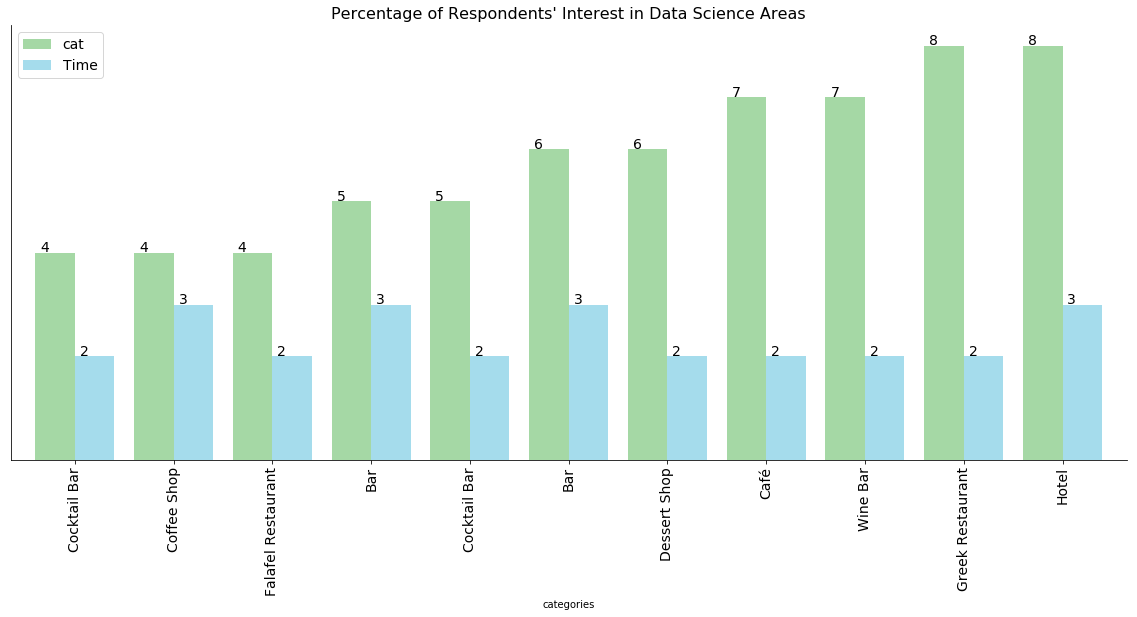

In [14]:
# Generating the first histogram
ax = df_competition1.plot(kind='bar', alpha=0.55,width=0.8, stacked=False, figsize=(20, 8),color=['#5cb85c','#5bc0de','#d9534f'])
#ax.set_xticklabels(('Data Analysis/Statistics', 'Machine Learning', 'Data Visualization', 'Big Data (Spark/Hadoop)', 'Deep Learning', 'Data Journalism'))
ax.set_title("Percentage of Respondents' Interest in Data Science Areas",fontsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.get_yaxis().set_ticks([])
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{}'.format(height), (x+0.05, y + height + 0.01), fontsize=14)
plt.legend(fontsize=14)
plt.xticks(fontsize=14)

#### When in competition based on distance from city center (shouldn't open in the distance defined above fromt the city center)

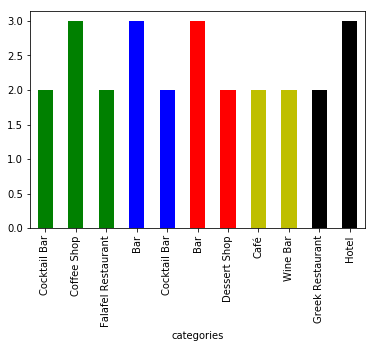

In [15]:
df_competition1['Time'].plot(kind='bar', color=tuple(["g","g","g", "b","b","r","r","y","y","k","k"]))

## Predictive models

#### In the next part we'll use decision trees and/or KNN to determine whether we should invest in a specific type of venue and how far way from the city center


### Decision tree

In [16]:
# first we modify the dataframe to include postalcode
values = {'postalCode': 10678}
dataframe_filtered.fillna(value=values)
dataframe_filtered
# Feature Matrix
X = df5[['distance']].values
X[0:5]
# Response vector
y = df5["categories"]
y[0:5]

#creating decision tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.05, random_state=3)
dectree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)

#fitting it
dectree.fit(X_trainset,y_trainset)
predTree = dectree.predict(X_testset)
print (predTree [0:5])
print (y_testset [0:5])


['Historic Site' 'Historic Site' 'Café' 'Coffee Shop']
61        Historic Site
57        Souvlaki Shop
77    Electronics Store
6       Meze Restaurant
Name: categories, dtype: object


### Accuracy of decision tree

In [17]:
#Testing accuracy
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.25


### Visualization

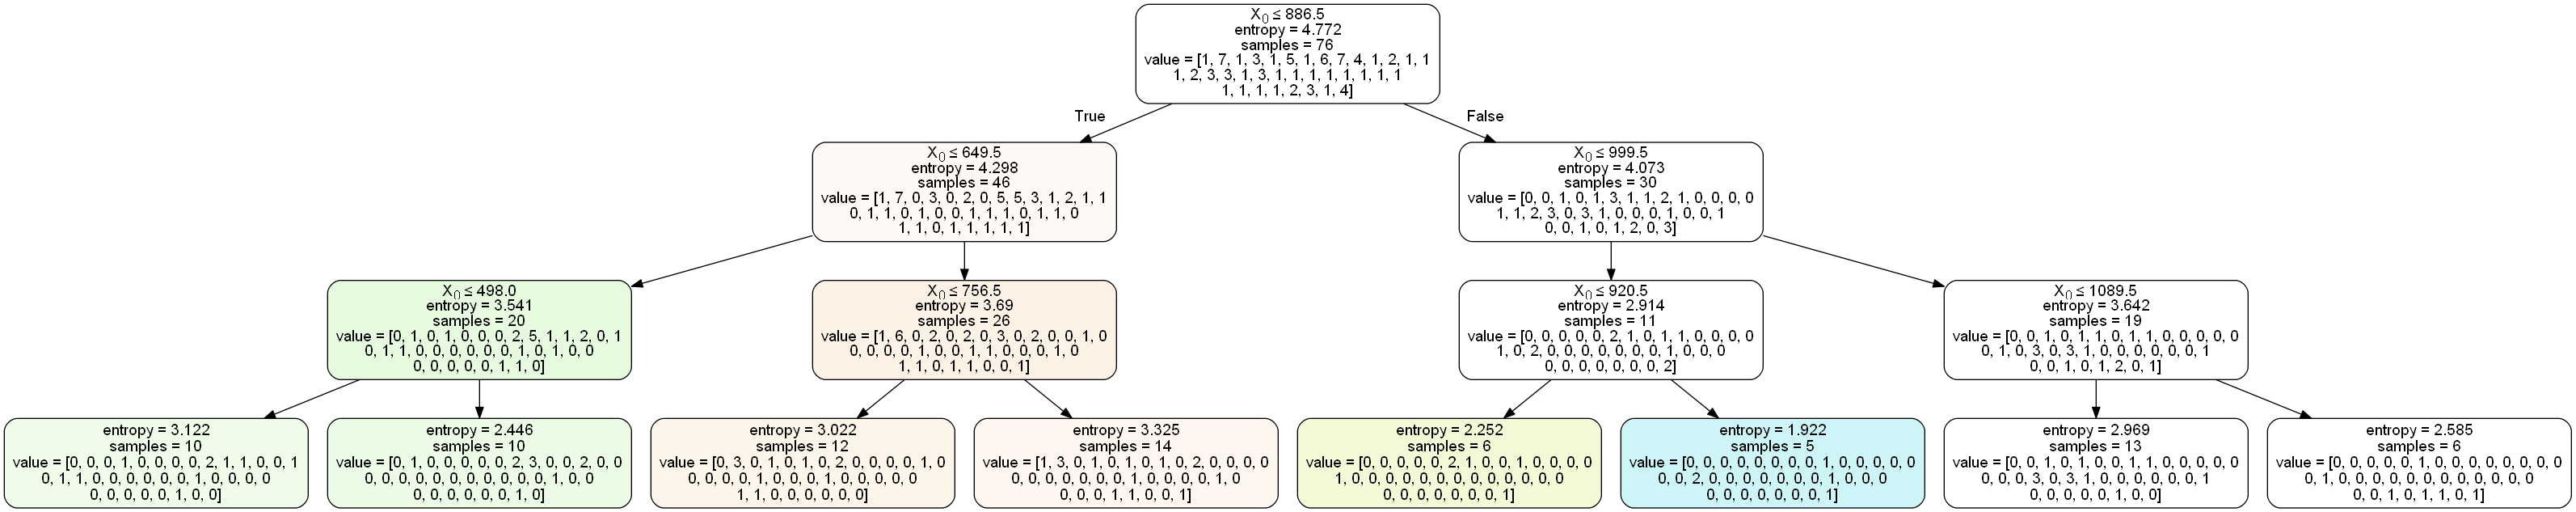

In [18]:
#Trying to visualize the tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dectree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### KNN

In [19]:
import itertools
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
X = df5[['distance']] .values  #.astype(float)
X[0:5]
y = df5['categories'].values
y[0:5]
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]
k = 3
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_trainset,y_trainset)
neigh
yhat = neigh.predict(X_testset)
yhat[0:5]

C:\Users\thwma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array(['Historic Site', 'Boutique', 'Hotel', 'Bookstore'], dtype=object)

### Accuracy of KNN and optimal k

In [20]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_trainset, neigh.predict(X_trainset)))
print("Test set Accuracy: ", metrics.accuracy_score(y_testset, yhat))

Train set Accuracy:  0.34210526315789475
Test set Accuracy:  0.25


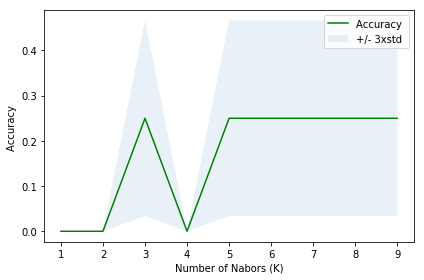

In [22]:
# Best k

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_trainset,y_trainset)
    yhat=neigh.predict(X_testset)
    mean_acc[n-1] = metrics.accuracy_score(y_testset, yhat)

    
    std_acc[n-1]=np.std(yhat==y_testset)/np.sqrt(yhat.shape[0])

mean_acc

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

### SVM

In [23]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_trainset, y_trainset)
yhat = clf.predict(X_testset)
yhat [0:5]

C:\Users\thwma\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array(['Coffee Shop', 'Coffee Shop', 'Coffee Shop', 'Coffee Shop'],
      dtype=object)

In [24]:
#f1 score
from sklearn.metrics import f1_score
f1_score(y_testset, yhat, average='weighted') 

C:\Users\thwma\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\thwma\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.0

In [25]:
#jaccard similarity score
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_testset, yhat)

0.0

### Results and Discussion

It is always very helpful to visualize our data and use all available methods in order to extract all of the information from our data set. The folium map gave us a general idea on how the venues are spread across the city center of Athens. We noticed that most venues are located south and southeast. The heatmap confirmed this and added more intuition on the level of competition the future business is going to face. Sparsity is helpful among venues in the same category, yet it doesn't help much overall since the best idea is to invest in a dense area lacking the particular type of venue we are interested in building. For this reason, we divided our map into numerical categories based on the distance from the city center and we found the categories of venues with the most presence within each distance bin. This can be found in the second histogram above. Due to limitations coming from the data used, we were unable to extract any useful information when using predictive models such as KNN, SVM and Decision trees since the accuracy of our models was at most 0.25 thus this is the future direction of this project.

### Conclusion

The scope of this project was to explore data for venues located in the center of Athens, Greece. By analyzing their density and location we were able to extract information about which investments will face high competition and thus will have high risk and low margin for profit and which are the ones that are considered good investments and highly profitable. Our report provides the answers to these questions.
The final decision on the optimal investment strategy will be made by investors based also on other characteristics of locations, taking into consideration additional factors like operating costs of each location (cost of rent or ownership), criminal rates, real estate availability, prices, social and economic dynamics of every neighborhood etc. 
Future directions of this project is of course the effort to collect more data and build more accurate predictive classification models.